<a href="https://colab.research.google.com/github/bab81/AI-Algorithms/blob/main/11_Linear_Regression_Revised_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with revised training!

Up to know we modeled data the way we do it in speread sheet! 

Why we need to split our data?

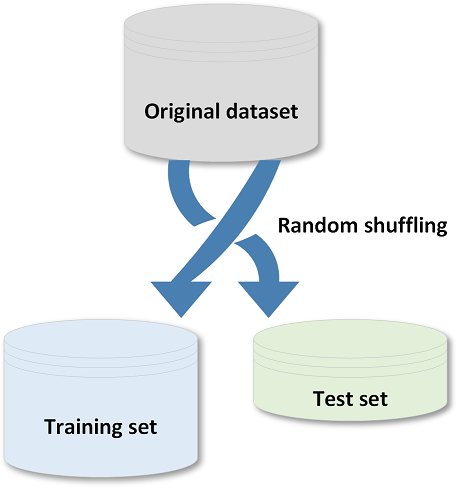

## Load Data 

We are using a dataset from Kaggle:
https://www.kaggle.com/ishaanv/ISLR-Auto 


Download the dataset and upload the Advertising.csv to your Colab 

Load Data, look at the head and tail! and create simple plots

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Advertising.csv")


In [ ]:
data.head()
#data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
X=data['TV']
Y=data['Sales']
m=len(data['Sales'])

## Normalize

In [ ]:
import numpy as np
X_N=(X-np.mean(X))/np.std(X)
Y_N=(Y-np.mean(Y))/np.std(Y)



## Shuffle

What if your data is in some order?!

In [ ]:
X_N

0      0.969852
1     -1.197376
2     -1.516155
3      0.052050
4      0.394182
         ...   
195   -1.270941
196   -0.617035
197    0.349810
198    1.594565
199    0.993206
Name: TV, Length: 200, dtype: float64

In [ ]:
idx = np.random.permutation(m) #get m random numbers. we will use these as indexes.
print (idx)
X_N,Y_N = X_N[idx], Y_N[idx] #change the internal order of my X and Y, using the random indexes
#note this adds retains original indexes in the first column

[129 135 157 120  29 103  82  32  35 119  40 188   1  51  49   3  24  43
  54 149  52  13 110 155 190  83 150 177 112  46  79 186 102  30 171 182
 185  17 158  76 136  23 166  77 117 107 130 189 113 191 170  11   7  60
 114  65  93  89 125 179 137  57 122  56 175  61 126  98 178 173 167  28
   8 109  67  19 192  84 106  75  86 184  92  74  59 145  21 176  33  91
  22  88 144  80  53  94 199  62 134 169 196 147   0 118  47 139 183  90
  45   9 146 133 162  85 156  44 154  12  58  18  37 161  78 105 128  42
 151 108  41   5  87  20 152  55  73  63  15 198 140  38 104   6 187  95
 141  69 193 100 197 123 124 181 127 148  16  81  36 165 111 121 138 160
 194 116  31  66 164 163 132  64 142  39  26  99  14  50  70 172 153  25
  10 143  27  71   2   4  96 115 101  48  72 168 195 159  97  68 180 131
 174  34]


In [ ]:
X_N

129   -1.021055
135   -1.153004
157    0.032199
120   -0.067054
29    -0.892610
         ...   
68     1.055093
180    0.111602
131    1.379711
174    0.879940
34    -0.599520
Name: TV, Length: 200, dtype: float64

In [ ]:
X_N[0]

0.9698522664314473

## Split Data to Training/Test

In [ ]:
int(m*0.7)

140

In [ ]:
#split into training and test data sets. 70-30% 

X_N_Training=X_N[0:int(m*0.7)] 
X_N_Test=X_N[int(m*0.7):]
#Y_N_Training=Y_N[0:int(m*0.7)]
Y_N_Test=Y_N[int(m*0.7):]

## Model Data

In [ ]:
P=np.polyfit(X_N_Training,Y_N_Training,1)
print (P)

[ 0.75779684 -0.01567257]


## Evaluate Model

### Compute Cost on Training Data

In [ ]:
print(X_N_Training)
type(X_N_Training)

79    -0.362479
4      0.394182
20     0.833233
78    -1.653942
114   -0.803865
         ...   
81     1.083118
67    -0.090408
167    0.697781
0      0.969852
139    0.442057
Name: TV, Length: 140, dtype: float64


pandas.core.series.Series

In [ ]:
# get rid of the indexes
X_N_Training=list(X_N_Training)
Y_N_Training=list(Y_N_Training)

In [ ]:
m_t=len(X_N_Training)
J_T=0
for i in range(m_t):
  J_T=J_T+(1/m_t)*(P[0]*X_N_Training[i]+P[1]-Y_N_Training[i])**2
print (J_T)

0.38731082352685425


### Compute Cost on Test Data

In [ ]:
# get rid of the indexes
X_N_Test=list(X_N_Test)
Y_N_Test=list(Y_N_Test)

In [ ]:
m_t=len(X_N_Test)
J_Test=0
for i in range(m_t):
  J_Test=J_Test+(1/m_t)*(P[0]*X_N_Test[i]+P[1]-Y_N_Test[i])**2
print (J_Test)

0.39283236373346236


### Visualize the result

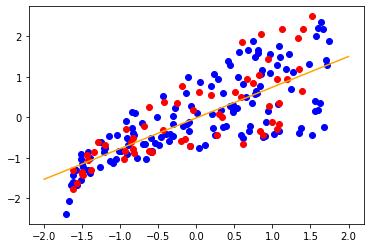

In [ ]:
Spending = np.linspace(-2,2,100)
Predicted_Numpy =  P[0]*Spending + P[1]
plt.scatter(X_N_Training,Y_N_Training, color='blue')
plt.scatter(X_N_Test,Y_N_Test,color='red')
plt.plot(Spending,Predicted_Numpy,color='Orange')

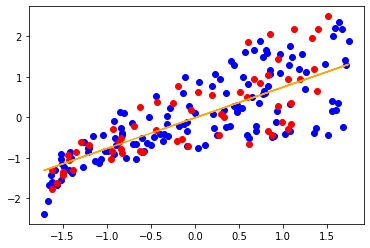

In [ ]:
#Should use the spending data from the file.
#Spending = np.linspace(-2,2,100)
Predicted_Numpy =  P[0]*X_N + P[1]
plt.scatter(X_N_Training,Y_N_Training, color='blue')
plt.scatter(X_N_Test,Y_N_Test,color='red')
plt.plot(X_N,Predicted_Numpy,color='Orange')